# IS 362 - Week 13 Assignment

### Johnny Zgombic

**Your assignment is to:**  

•First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!     
•Create a pandas DataFramewith a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.   
•Add meaningful names for each column. 
•Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.  
•Perform exploratory data analysis: (1) show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected. (2) Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.  

**The first step is to import all of the necessary tools that we need to complete our tasks.**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**The next step is to create our variables, select the columns we will be using, read the data using** *pandas* **and displaying our data using the** *head()* **function.**

In [66]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
columns = [0,4,5,22]
column_names = ['Class', 'Bruises', 'Odor', 'Habitat']
mushrooms = pd.read_csv(url, sep=',', usecols=columns, header=None, names=column_names)
mushrooms.head()

,Class,Bruises,Odor,Habitat
0,p,t,p,u
1,e,t,a,g
2,e,t,l,m
3,p,t,p,u
4,e,f,n,g


**Numeric Keys**

Class
    - edible = e = 0
    - poisonous = p = 1 

Bruises
    - bruises = t = 10
    - no = f = 11

Odor
    - almond = a = 20
    - anise = l = 21
    - creosote = c = 22
    - fishy = y = 23
    - foul = f = 24
    - musty = m = 25
    - none = n = 26
    - pungent = p = 27
    - spicy = s = 28

Habitat
    - grasses = g = 30
    - leaves = l = 31
    - meadows = m = 32
    - paths = p = 33
    - urban = u = 34
    - waste = w = 35
    - woods = d = 36

In [67]:
mushrooms['Class'] = mushrooms['Class'].map({'e':0, 'p':1})
mushrooms['Bruises'] = mushrooms['Bruises'].map({'t':10, 'f':11})
mushrooms['Odor'] = mushrooms['Odor'].map({'a':20, 'l':21, 'c':22, 'y':23, 'f':24, 'm':25, 'n':26, 'p':27, 's':28})
mushrooms['Habitat'] = mushrooms['Habitat'].map({'g':30, 'l':31, 'm':32, 'p':33, 'u':34, 'w':35, 'd':36})
mushrooms.head()

,Class,Bruises,Odor,Habitat
0,1,10,27,34
1,0,10,20,30
2,0,10,21,32
3,1,10,27,34
4,0,11,26,30


**In the chart below, you can see that mushrooms are almost evenly split between** *edible (0)* **and** *poisonous (1)* **varieties.**

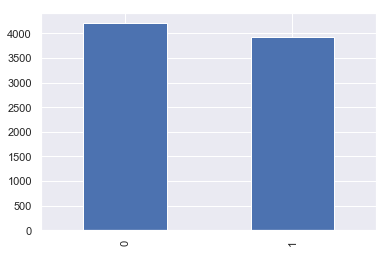

In [41]:
data['Class'].value_counts()[:20].plot(kind='bar')

**Once again, in the chart below, you can see that mushrooms are almost evenly split between** *bruised (10)* **and** *non-bruised (11)* **varieties.**

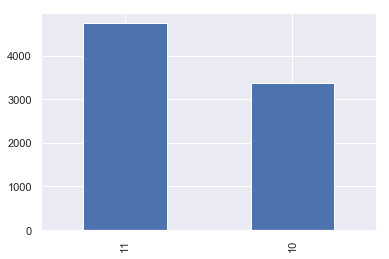

In [42]:
data['Bruises'].value_counts()[:20].plot(kind='bar')

**In this chart, we are seeing the number of mushrooms in each** *Odor* **category, where no odor has the lead while a musty odor falls in last place.**

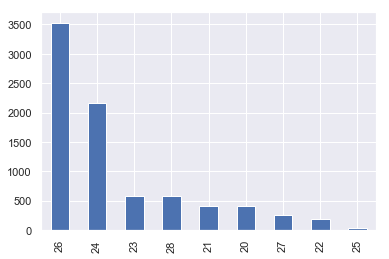

In [43]:
data['Odor'].value_counts()[:20].plot(kind='bar')

**In this chart, we are seeing the number of mushrooms in each** *Habitat* **category, where the woods has the lead while in waste falls in last place.**

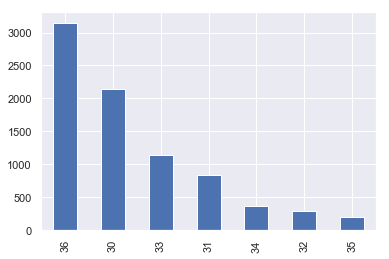

In [44]:
data['Habitat'].value_counts()[:20].plot(kind='bar')

**The below scatter plot shows us that mushrooms that grow in** *Almond* **and** *Anise* **odors are edible, those with no odor can be either edible or poisonous and the rest are poisonous.**

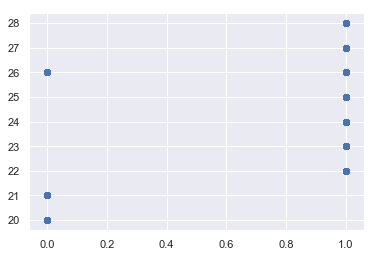

In [59]:
plt.scatter(x='Class', y='Odor',data=mushrooms)

**The below scatter plot shows us that mushrooms that grow in** *waste* **are the only mushrooms that you can be sure are not poisonous.**

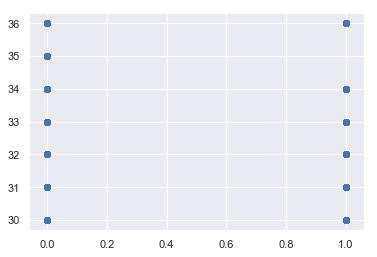

In [61]:
plt.scatter(x='Class', y='Habitat',data=mushrooms)

**The below scatter plot shows us that there really is no correlation between where mushrooms grow and their odor. The only thing we are sure of is that mushrooms grown in waste do not have an odor.**

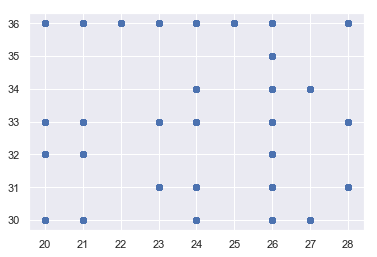

In [70]:
plt.scatter(x='Odor', y='Habitat',data=mushrooms)